<a href="https://colab.research.google.com/github/sendyprstyo/Sendy_KC_TI1B/blob/main/face_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kecerdasan Buatan

## Jobsheet 1

Image converted to grayscale successfully.


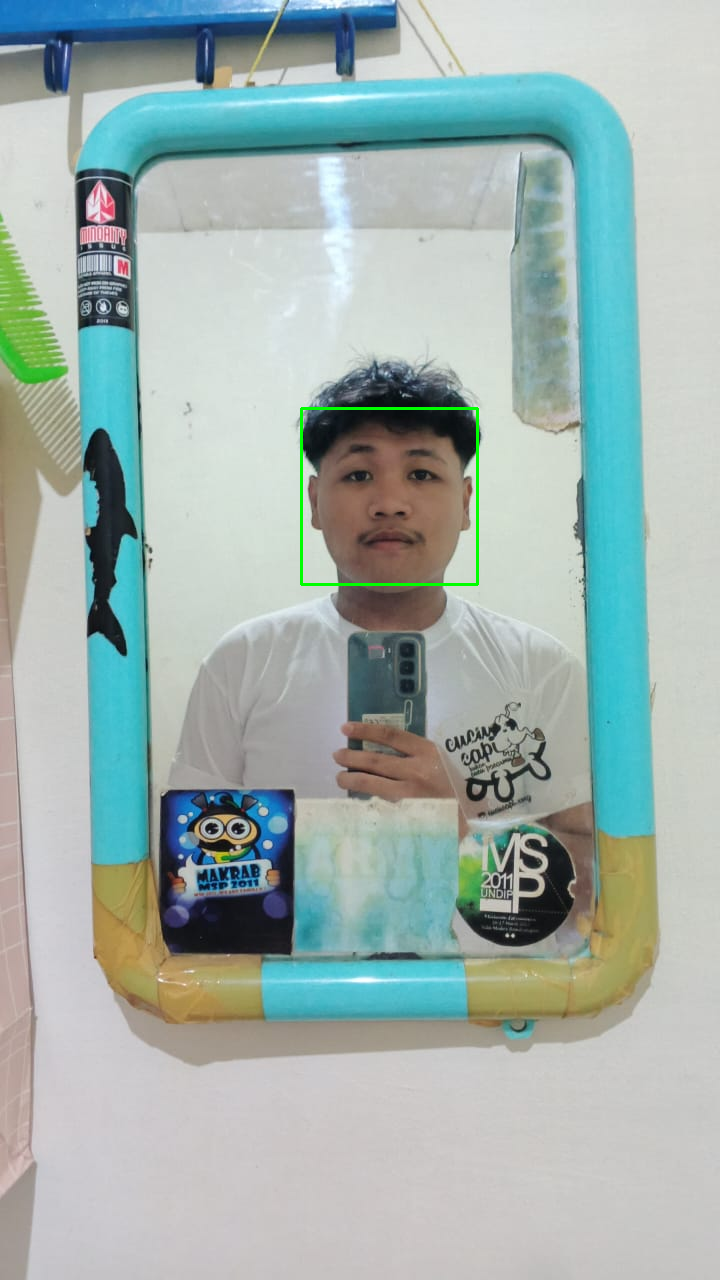

In [1]:
from google.colab.patches import cv2_imshow

import cv2
img = cv2.imread('/content/sendykc1.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Check if the image was loaded successfully
if img is None:
  print("Error: Image not loaded. Please check the file path.")
else:
# Convert the image to grayscale
  gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  print("Image converted to grayscale successfully.")

haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
faces_rect = haar_cascade.detectMultiScale(gray, 1.1, 9)

for (x, y, w, h) in faces_rect:
  cv2.rectangle(img, (x, y), (x+w, y+h),
  (0, 255, 0), 2)

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

